In [1]:
# use conda env "geo_env"
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import functions_analogues_PrMax as fanPM

#### Parameters

In [2]:
n_nodes = 6
data_dir = '/work_big/users/clima/portal/CERRA/'                              # tintin 
fig_dir = '/home/portal/figures/case-studies_byNode/'                         # tintin
# data_dir = '/media/alice/Crucial X9/portal/data_CNR/CERRA/'                     # local
# fig_dir = '/home/alice/Desktop/CNR/ENCIRCLE/materiale_alice/figures/PrMax/'     # local

# lon lat boxes
lonlat_box_wide = [-20, 40, 28, 65]
lonlat_box_italy = [5, 20, 36, 47.5]

#### Upload excel node file with list of main precip events

In [3]:
# Selection
lselect = 'alert-regions'  # 'Italy' or 'wide-region' or 'alert-regions'
# Upload the data
for node in range(1,n_nodes+1):
    if lselect == 'wide-region':
        globals()[f'df_events_{node}'] = pd.read_excel(data_dir+'events_on_wide_regions.xlsx', sheet_name=node-1)
    elif lselect == 'alert-regions':
        globals()[f'df_events_{node}'] = pd.read_excel(data_dir+'events_cum_on_above99_alertregions_CERRA.xlsx', sheet_name=node-1)
    elif lselect == 'Italy':
        globals()[f'df_events_{node}'] = pd.read_excel(data_dir+'events_on_Italy.xlsx', sheet_name=node-1)
# Titles of the columns
column_titles = df_events_1.columns.tolist()
print(column_titles)

['Index', 'Time', 'Alert regions above 99', 'Precipitation volume exceeding 99']


#### For each node, plot geopotential height and mslp for every PrMax_wideregion event 

In [ ]:
for node in range(1,2): #n_nodes+1):

    # Loop through each time in df_events_1 and plot the data
    df_events = globals()[f'df_events_{node}']
    ntimes = len(df_events['Time'])
    # Initialise figure
    fig, axes = plt.subplots(ntimes, 2, figsize=(10, 3 * ntimes), subplot_kw={'projection': ccrs.PlateCarree()})
    # Loop over times extremes
    for i, time in enumerate(df_events['Time']):
        ax0, ax1 = (axes[i,0], axes[i,1])
        # Load the data
        z500 = fanPM.load_ERA5_data('z500', '6hr', time + np.timedelta64(12, 'h'), lonlat_box_wide, l_anom=False)
        mslp = fanPM.load_ERA5_data('mslp', 'daily', time + np.timedelta64(12, 'h'), lonlat_box_wide, l_anom=False)
        precip = fanPM.load_CERRA_precip(time, lonlat_box_italy)
        # Plot the data
        fanPM.plot_geopotential_and_mslp(ax0, time + np.timedelta64(12, 'h'), lonlat_box_wide, z500, mslp)
        fanPM.plot_precipitation(ax1, time, lonlat_box_italy, precip, precip_levels=np.arange(0,110,10))
    fig.tight_layout()
    if lselect == 'wide-region':
        fig.savefig(f'{fig_dir}node{node}-extremes-wideregions_z500_mslp_precip.png')
    elif lselect == 'alert-regions':
        fig.savefig(f'{fig_dir}node{node}-extremes-alertregions_precip_z500_mslp.png')
    elif lselect == 'Italy':
        fig.savefig(f'{fig_dir}node{node}-extremes-Italy_z500_mslp_precip.png')

/home/portal/anaconda3/envs/geo_env_xesmf/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/portal/anaconda3/envs/geo_env_xesmf/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


KeyboardInterrupt: 

: 

: 

#### Visualise synoptic maps before / after a certain event

In [21]:
# Event selection
no_node = 1 # 1 to 6
no_event = 1 # 1 to Nmax
tlag = 2 # days
tfreq = '12h'

# Reference data
df_event =  globals()[f'df_events_{no_node}'].iloc[no_event-1]
tref = df_event['Time'] + np.timedelta64(12, 'h')
tseries = pd.date_range(tref - np.timedelta64(tlag, 'D'), tref + np.timedelta64(tlag, 'D'), freq=tfreq)
ind_event = df_event['Index']

In [22]:
import os
import xarray as xr

def lonlat_mask(lon, lat, lonlat_bounds):
    """Returns the mask for the lonlat_bounds."""
    if lonlat_bounds[0]<0 and lonlat_bounds[1]>0:
        lon_mask = (lon >= lonlat_bounds[0]) | (lon <= lonlat_bounds[1])
    else:
        lon_mask = (lon >= lonlat_bounds[0]) & (lon <= lonlat_bounds[1])
    lat_mask = (lat >= lonlat_bounds[2]) & (lat <= lonlat_bounds[3])
    return lon_mask, lat_mask

/home/portal/anaconda3/envs/geo_env/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/portal/anaconda3/envs/geo_env/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/portal/anaconda3/envs/geo_env/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/portal/anaconda3/envs/geo_env/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/portal/anaconda3/envs/geo_env/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linew

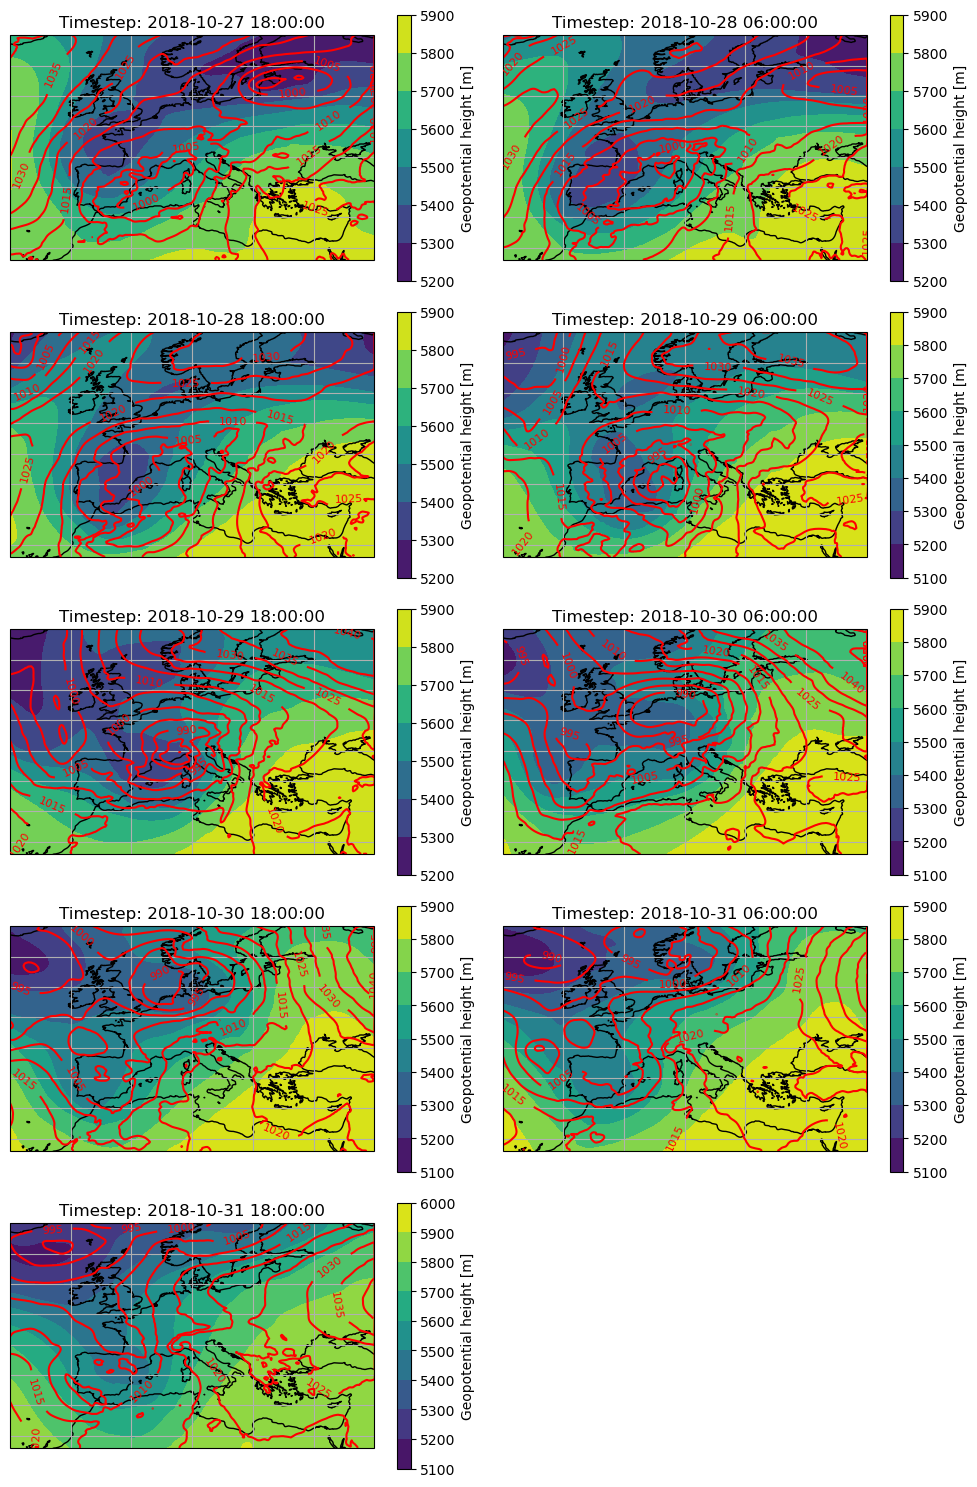

In [23]:
lonlat_box_wide = [-20, 40, 28, 65]
ntimes = len(tseries)

# Load the data
z500 = fanPM.load_ERA5_data('z500', '6hr', tseries, lonlat_box_wide, l_anom=False)
mslp = fanPM.load_ERA5_data('mslp', '6hr', tseries, lonlat_box_wide, l_anom=False)

# Initialise figure
nrows = int(np.ceil(ntimes/2))
fig, axes = plt.subplots(nrows, 2, figsize=(10, 3 * nrows), subplot_kw={'projection': ccrs.PlateCarree()})
# Loop over timeseries
for it, tstep in enumerate(tseries):
    ax0 = axes[it//2,it%2]
    fanPM.plot_geopotential_and_mslp(ax0, tstep, lonlat_box_wide, z500.sel(time=tstep), mslp.sel(time=tstep))
#     fanPM.plot_precipitation(ax1, tstep, lonlat_box_italy)
axes[-1,-1].axis('off')
fig.tight_layout()
if lselect == 'wide-region':
    fig.savefig(f'{fig_dir}tseries_node{no_node}_extreme{no_event}-wideregions_z500_mslp.png')
elif lselect == 'alert-regions':
    fig.savefig(f'{fig_dir}tseries_node{no_node}_extreme{no_event}-alertregions_z500_mslp.png')
elif lselect == 'Italy':
    fig.savefig(f'{fig_dir}tseries_node{no_node}_extreme{no_event}-Italy_z500_mslp.png')